In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_connections_raw.csv # all cells, non-alphabetical
/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_connections_reindexed.csv # reindexed. doesn't have Trilaminar (as in the original notebook), has additional experimental data to compare with.
/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_means.csv #for connections

/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_synapses_result.csv # only AA,OLM,PC,Tri
/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_synapses.csv # all mtypes

In [2]:
div_conn_raw_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_connections_raw.csv'  # all cells, non-alphabetical

In [5]:
div_conn_raw = pd.read_csv(div_conn_raw_path,index_col=0)

In [6]:
div_conn_raw

,EXC,EXC_SD,EXC_SEM,INH,INH_SD,INH_SEM,TOT,TOT_SD,TOT_SEM
SCA,1077.500000,175.695523,71.727397,318.666667,36.722684,14.991973,1396.166667,210.691256,86.014345
PPA,412.857143,48.245686,10.528072,48.571429,8.115661,1.770982,461.428571,45.718155,9.976519
PVBC,425.357616,89.918384,7.317454,229.576159,40.746419,3.315897,654.933775,126.311801,10.279109
OLM,786.745098,334.009795,46.770726,99.333333,48.188220,6.747701,886.078431,377.884246,52.914378
Tri,954.583333,351.800715,101.556119,295.416667,41.503932,11.981153,1250.000000,388.053905,112.021513
CCKBC,2039.358696,293.356423,30.584521,257.902174,26.712259,2.784946,2297.260870,313.141893,32.647299
PC,168.157153,47.885459,0.643585,54.868678,13.553786,0.182164,223.025831,58.073250,0.780509
Ivy,1018.092050,164.629672,10.649008,204.418410,26.125555,1.689922,1222.510460,186.730779,12.078610
AA,218.837209,62.165170,9.480100,0.000000,0.000000,0.000000,218.837209,62.165170,9.480100
BP,925.571429,133.952931,50.629449,320.714286,29.922348,11.309585,1246.285714,155.363826,58.722007


In [8]:
means = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/divergence_means.csv',index_col=0)
means

,SR_SCA,SLM_PPA,SP_PVBC,SP_BS,SO_OLM,SO_Tri,SP_CCKBC,SO_BS,SP_PC,SP_Ivy,SP_AA,SO_BP
SR_SCA,17.000000,1.666667,149.166667,40.333333,18.833333,8.166667,35.666667,3.333333,5560.500000,181.833333,18.333333,2.833333
SLM_PPA,1.190476,4.047619,74.761905,1.619048,0.000000,0.190476,36.142857,0.000000,2452.380952,12.714286,21.666667,0.428571
SP_PVBC,4.695364,0.026490,236.238411,105.682119,11.470199,11.364238,37.264901,3.158940,4992.086093,217.245033,22.403974,4.781457
SP_BS,10.931818,0.181818,734.500000,281.250000,62.772727,42.454545,104.045455,16.363636,18290.340909,790.818182,82.818182,10.295455
SO_OLM,4.098039,14.745098,169.000000,3.803922,0.784314,0.372549,93.509804,0.196078,8910.764706,35.705882,27.411765,0.333333
SO_Tri,5.583333,0.250000,393.750000,137.166667,125.166667,23.750000,50.166667,14.333333,9259.666667,361.000000,51.833333,8.250000
SP_CCKBC,8.097826,0.021739,505.195652,211.380435,22.163043,26.021739,56.130435,5.891304,18624.793478,469.250000,39.413043,8.652174
SO_BS,4.818182,0.454545,261.454545,83.727273,28.181818,12.181818,58.909091,5.454545,5276.363636,256.181818,23.272727,5.363636
SP_PC,2.419978,0.000000,88.630058,24.630419,40.235910,13.130419,15.801481,12.122652,213.728143,99.969653,13.453215,3.335079
SP_Ivy,6.460251,0.004184,513.376569,161.167364,13.728033,22.765690,63.263598,3.581590,14593.192469,452.569038,38.167364,6.832636


In [14]:
import seaborn as sns
from matplotlib.colors import SymLogNorm

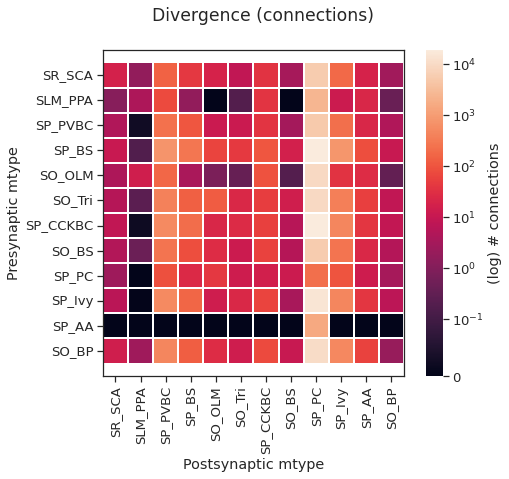

In [19]:
sns.set(style="ticks", font_scale=1.2)

fig, ax = plt.subplots(figsize=(8, 6))

# for heatmap with logarithmic scale
sns.heatmap(means, norm=SymLogNorm(linthresh=0.1), ax=ax, square=True,  linewidths=.1)

ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

fig.suptitle('Divergence (connections)')
ax.set_xlabel('Postsynaptic mtype')
ax.set_ylabel('Presynaptic mtype')

cbar = ax.collections[0].colorbar
cbar.set_label("(log) # connections") # labelpad=-40
#cbar.set_ticks([0, 1, 10, 100, 1000])

#filename = output + 'divergence_connections_matrix.pdf'

# fix for mpl bug that cuts off top/bottom of seaborn viz
# https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

#plt.savefig(filename, bbox_inches='tight')
plt.show()

In [20]:
means

,SR_SCA,SLM_PPA,SP_PVBC,SP_BS,SO_OLM,SO_Tri,SP_CCKBC,SO_BS,SP_PC,SP_Ivy,SP_AA,SO_BP
SR_SCA,17.000000,1.666667,149.166667,40.333333,18.833333,8.166667,35.666667,3.333333,5560.500000,181.833333,18.333333,2.833333
SLM_PPA,1.190476,4.047619,74.761905,1.619048,0.000000,0.190476,36.142857,0.000000,2452.380952,12.714286,21.666667,0.428571
SP_PVBC,4.695364,0.026490,236.238411,105.682119,11.470199,11.364238,37.264901,3.158940,4992.086093,217.245033,22.403974,4.781457
SP_BS,10.931818,0.181818,734.500000,281.250000,62.772727,42.454545,104.045455,16.363636,18290.340909,790.818182,82.818182,10.295455
SO_OLM,4.098039,14.745098,169.000000,3.803922,0.784314,0.372549,93.509804,0.196078,8910.764706,35.705882,27.411765,0.333333
SO_Tri,5.583333,0.250000,393.750000,137.166667,125.166667,23.750000,50.166667,14.333333,9259.666667,361.000000,51.833333,8.250000
SP_CCKBC,8.097826,0.021739,505.195652,211.380435,22.163043,26.021739,56.130435,5.891304,18624.793478,469.250000,39.413043,8.652174
SO_BS,4.818182,0.454545,261.454545,83.727273,28.181818,12.181818,58.909091,5.454545,5276.363636,256.181818,23.272727,5.363636
SP_PC,2.419978,0.000000,88.630058,24.630419,40.235910,13.130419,15.801481,12.122652,213.728143,99.969653,13.453215,3.335079
SP_Ivy,6.460251,0.004184,513.376569,161.167364,13.728033,22.765690,63.263598,3.581590,14593.192469,452.569038,38.167364,6.832636


In [23]:
df = pd.read_csv('iterconnections_matrix_mtype.csv',index_col=0)

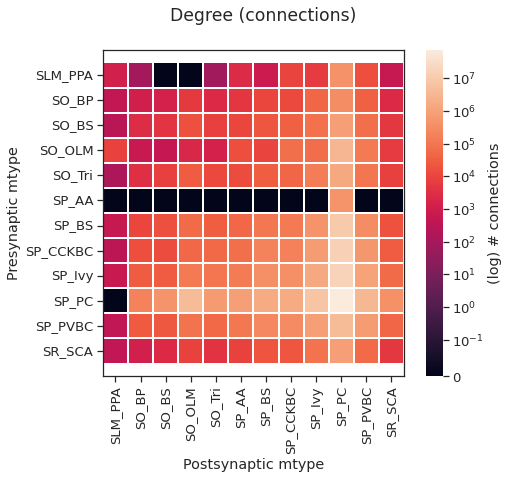

In [26]:
sns.set(style="ticks", font_scale=1.2)

fig, ax = plt.subplots(figsize=(8, 6))

# for heatmap with logarithmic scale
sns.heatmap(df, norm=SymLogNorm(linthresh=0.1), ax=ax, square=True,  linewidths=.1)

ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

fig.suptitle('Degree (connections)')
ax.set_xlabel('Postsynaptic mtype')
ax.set_ylabel('Presynaptic mtype')

cbar = ax.collections[0].colorbar
cbar.set_label("(log) # connections") # labelpad=-40
#cbar.set_ticks([0, 1, 10, 100, 1000])

#filename = output + 'divergence_connections_matrix.pdf'

# fix for mpl bug that cuts off top/bottom of seaborn viz
# https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

#plt.savefig(filename, bbox_inches='tight')
plt.show()

In [27]:
df

,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
SLM_PPA,1225,88,0,0,74,2555,773,10252,6006,422103,15199,581
SO_BP,457,1134,1400,5597,2402,4596,10964,11674,46942,338965,33275,2258
SO_BS,308,2895,4223,16121,7359,10798,22821,35200,79767,795585,73807,5177
SO_OLM,8729,678,531,1964,1307,15811,9442,73467,62449,3071369,121755,6251
SO_Tri,140,3461,8429,28402,11273,13860,31400,44639,141752,1315872,99372,7421
SP_AA,0,0,0,0,0,0,0,0,0,476033,0,0
SP_BS,609,10336,16258,58426,32327,49623,112441,123175,462918,9606455,333472,19157
SP_CCKBC,339,15046,14326,49453,55981,68907,183479,175340,710930,13790284,565966,29736
SP_Ivy,642,29639,29729,124206,103414,135712,368876,357824,1329319,17058538,1064159,58405
SP_PC,0,186379,485824,4073914,646741,809880,1582505,1568538,6780666,74379351,3495197,397203


In [28]:
df.sum(axis=0)

SLM_PPA         13278
SO_BP          276526
SO_BS          586132
SO_OLM        4448398
SO_Tri         920007
SP_AA         1231378
SP_BS         2582482
SP_CCKBC      2716946
SP_Ivy       10482313
SP_PC       126229737
SP_PVBC       6595865
SR_SCA         577981
dtype: int64

In [29]:
df.sum(axis=1)

SLM_PPA       458856
SO_BP         459664
SO_BS        1054061
SO_OLM       3373753
SO_Tri       1706021
SP_AA         476033
SP_BS       10825197
SP_CCKBC    15659787
SP_Ivy      20660463
SP_PC       94406198
SP_PVBC      6584630
SR_SCA        996380
dtype: int64